Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Model
import keras as keras

from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

%matplotlib inline

Extract data and train and test dataset

In [2]:
cifar100 = tf.keras.datasets.cifar100
(x_train,y_train) , (x_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 13s 0us/step


In [3]:
x,y = [],[]

for i in range(len(x_train)):
  if(y_train[i]==36):
    x.append(x_train[i])
    y.append(0)
  if(y_train[i]==50):
    x.append(x_train[i])
    y.append(1)
  if(y_train[i]==65):
    x.append(x_train[i])
    y.append(2)
  if(y_train[i]==74):
    x.append(x_train[i])
    y.append(3)
  if(y_train[i]==80):
    x.append(x_train[i])
    y.append(4)
x_train = np.array(x)
y_train = np.array(y)

_x,_y = [],[]

for i in range(len(x_test)):
  if(y_test[i]==36):
    _x.append(x_test[i])
    _y.append(0)
  if(y_test[i]==50):
    _x.append(x_test[i])
    _y.append(1)
  if(y_test[i]==65):
    _x.append(x_test[i])
    _y.append(2)
  if(y_test[i]==74):
    _x.append(x_test[i])
    _y.append(3)
  if(y_test[i]==80):
    _x.append(x_test[i])
    _y.append(4)
x_test = np.array(_x)
y_test = np.array(_y)


In [4]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

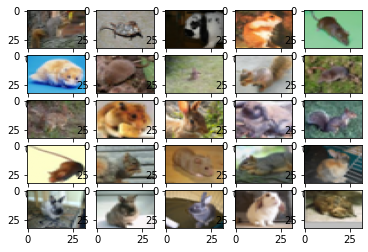

In [6]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [7]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

number of classes: 5


In [8]:
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
# x = tf.keras.applications.densenet.DenseNet121(include_top=False,weights='imagenet')(i)
# x.trainable = False

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)

In [9]:
# model description
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [10]:
# Compile
# initial_learning_rate = 0.0001
# decay_steps=100
# decay_rate=0.9
# lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps,decay_rate)
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [20]:
def show_metric(log):
  val_loss = log.history['val_loss']
  val_acc = log.history['val_accuracy']
      
  fig, axes = plt.subplots(1, 2, figsize=(14,4))
  ax1, ax2 = axes
  ax1.plot(log.history['loss'], label='train')
  ax1.plot(val_loss, label='test')
  ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
  ax2.plot(log.history['accuracy'], label='train')
  ax2.plot(val_acc, label='test')
  ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
  for ax in axes: ax.legend()

In [13]:
# Fit
# r = model.fit(
#   x_train, y_train, validation_data=(x_test, y_test), epochs=50)
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
78/78 [==============================] - 15s 26ms/step - loss: 2.2500 - accuracy: 0.3679 - val_loss: 2.1443 - val_accuracy: 0.2000
Epoch 2/50
78/78 [==============================] - 1s 18ms/step - loss: 1.3899 - accuracy: 0.4323 - val_loss: 2.5789 - val_accuracy: 0.2000
Epoch 3/50
78/78 [==============================] - 1s 18ms/step - loss: 1.2848 - accuracy: 0.4806 - val_loss: 2.8883 - val_accuracy: 0.1960
Epoch 4/50
78/78 [==============================] - 2s 19ms/step - loss: 1.2212 - accuracy: 0.5012 - val_loss: 2.1403 - val_accuracy: 0.2220
Epoch 5/50
78/78 [==============================] - 1s 19ms/step - loss: 1.1760 - accuracy: 0.5130 - val_loss: 1.3967 - val_accuracy: 0.4340
Epoch 6/50
78/78 [==============================] - 2s 20ms/step - loss: 1.1265 - accuracy: 0.5531 - val_loss: 1.6660 - val_accuracy: 0.4000
Epoch 7/50
78/78 [==============================] - 2s 19ms/step - loss: 1.0937 - accuracy: 0.5758 - val_loss: 1.5301 - val_accuracy: 0.4220
Epoch 8/50
7

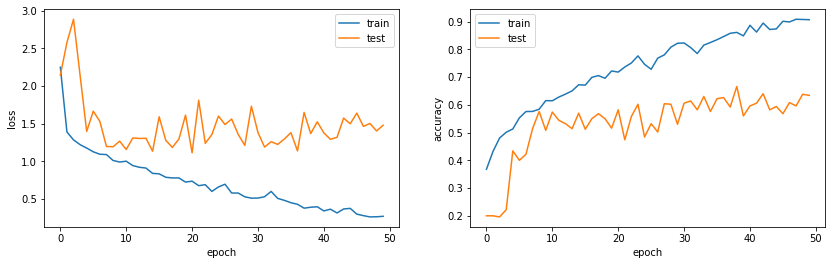

In [21]:
# Plot accuracy per iteration
show_metric(r)

In [23]:
label_train_predictions=model.predict(x_train).argmax(axis=1)
label_test_predictions=model.predict(x_test).argmax(axis=1)

In [24]:
label_train_predictions.shape,label_test_predictions.shape

((2500,), (500,))

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_train, label_train_predictions))
print("----------------------------------------------------------")
print(classification_report(y_test, label_test_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       500
           1       0.95      0.91      0.93       500
           2       0.94      0.91      0.92       500
           3       0.90      0.98      0.94       500
           4       0.95      0.94      0.94       500

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500

----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       100
           1       0.54      0.51      0.53       100
           2       0.65      0.55      0.59       100
           3       0.56      0.76      0.64       100
           4       0.65      0.64      0.64       100

    accuracy                           0.63       500
   macro avg       0.64      0.63      0.63       500
weighted avg      

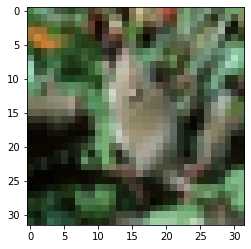

In [34]:
image_number=80

plt.imshow(x_test[image_number])

In [35]:
n = np.array(x_test[image_number])
labels = '''hamster mouse rabbit shrew squirrel'''.split()
predicted_label = labels[model.predict(n[None,:]).argmax()]

original_label = labels[y_test[image_number]]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

Original label is mouse and predicted label is mouse


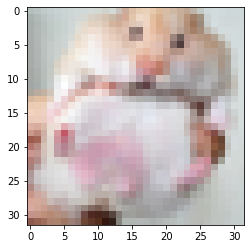

In [43]:
image_number=101

plt.imshow(x_test[image_number])

In [44]:
n = np.array(x_test[image_number])
labels = '''hamster mouse rabbit shrew squirrel'''.split()
predicted_label = labels[model.predict(n[None,:]).argmax()]

original_label = labels[y_test[image_number]]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

Original label is hamster and predicted label is hamster
